In [7]:
import pandas as pd
import os

# Load raw data
df = pd.read_csv('raw_data.csv')

# 1. Check for missing values
print("Missing values:\n", df.isnull().sum())

# 2. Data Type Conversion
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'Yes', 0: 'No'})
df['Churn_Numeric'] = df['Churn'] # Keep a numeric copy for correlation

# 3. Save cleaned data
if not os.path.exists('../data'): os.makedirs('../data')
df.to_csv('../data/cleaned_data.csv', index=False)
print("Data Cleaned and Saved to data/cleaned_data.csv")

Missing values:
 CustomerID          0
Tenure              0
MonthlyCharges      0
TotalCharges        0
Contract            0
PaymentMethod       0
PaperlessBilling    0
SeniorCitizen       0
Churn               0
dtype: int64
Data Cleaned and Saved to data/cleaned_data.csv


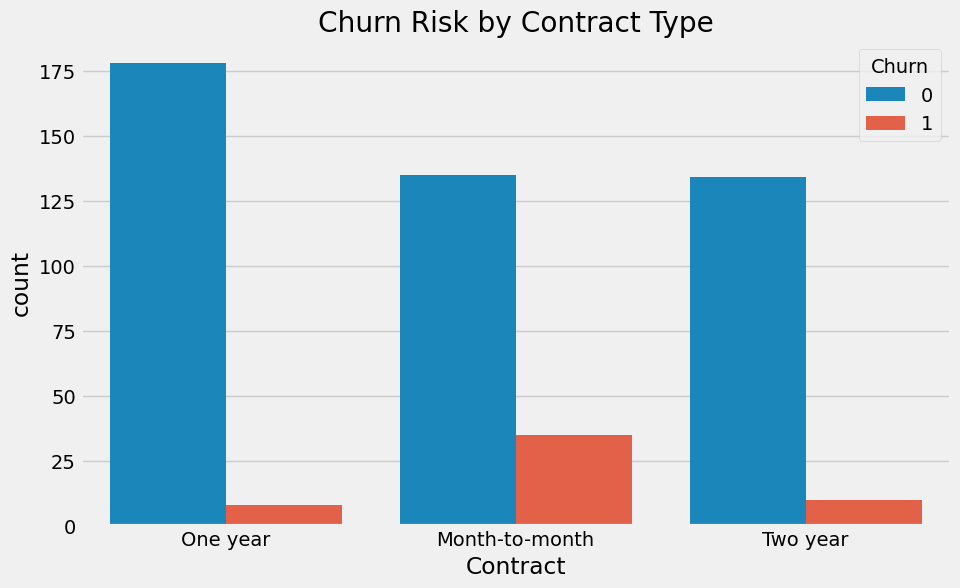

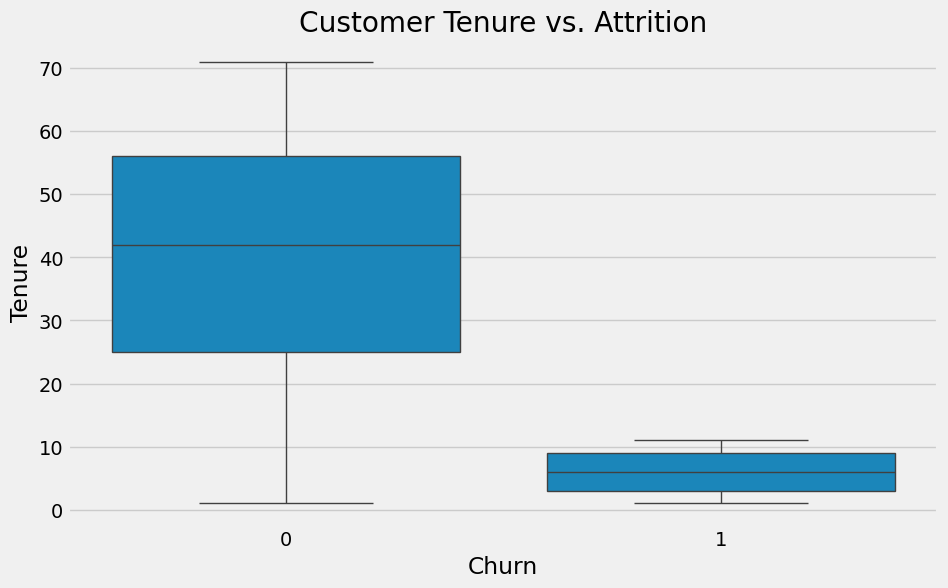

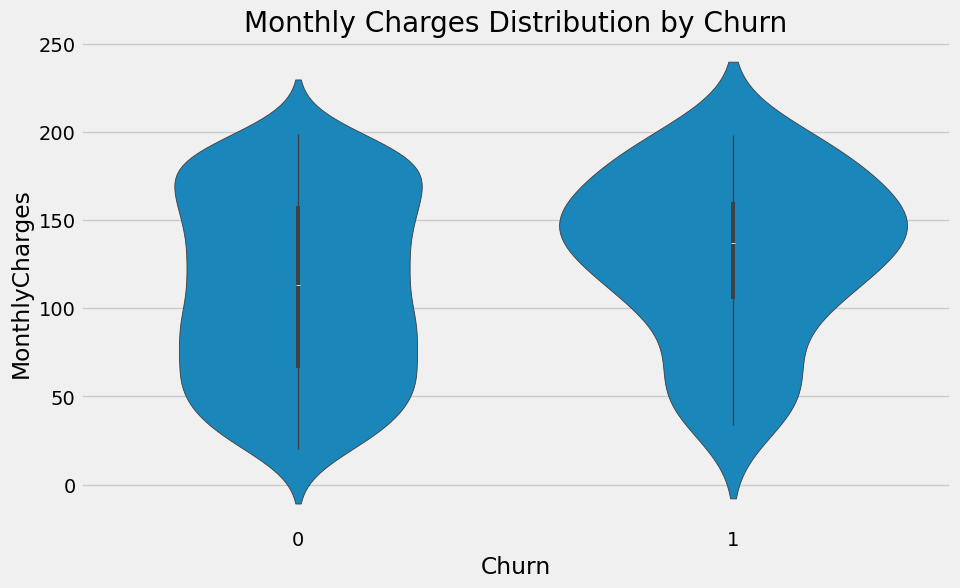

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/cleaned_data.csv')
plt.style.use('fivethirtyeight')

# Viz 1: Churn by Contract Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn Risk by Contract Type')
plt.savefig('../presentation/churn_contract.png')

# Viz 2: Tenure vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Tenure', data=df)
plt.title('Customer Tenure vs. Attrition')
plt.savefig('../presentation/tenure_churn.png')

# Viz 3: Monthly Charges Impact
plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges Distribution by Churn')
plt.savefig('../presentation/charges_dist.png')

In [9]:
import pandas as pd
from scipy.stats import chi2_contingency

df = pd.read_csv('../data/cleaned_data.csv')

# Statistical Test: Chi-Square (Categorical Relationship)
contingency = pd.crosstab(df['Contract'], df['Churn'])
chi2, p, dof, ex = chi2_contingency(contingency)

print(f"Chi-Square P-Value: {p}")
if p < 0.05:
    print("Conclusion: Contract type significantly impacts Churn.")

# Business Implementation Plan Logic
print("Recommendation: Targeted retention for Month-to-Month contracts.")

Chi-Square P-Value: 9.58735427092388e-07
Conclusion: Contract type significantly impacts Churn.
Recommendation: Targeted retention for Month-to-Month contracts.
